<a href="https://colab.research.google.com/github/tintenderete/TFM/blob/main/ranking_tonto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# DESCARGAR Y LIMPIAR DATOS

In [ ]:

tickers = [
"ANA.MC", "ACX.MC", "ACS.MC", "AENA.MC", "AMS.MC", "MTS.MC", "SAB.MC", "BKIA.MC", "BKT.MC", "BBVA.MC", "CABK.MC",
"CLNX.MC", "CIE.MC", "ENG.MC", "ELE.MC", "FER.MC", "GRF.MC", "IAG.MC", "IBE.MC", "ITX.MC", "IDR.MC", "COL.MC",
"MEL.MC", "MRL.MC", "NTGY.MC", "PHM.MC", "REE.MC", "REP.MC", "SGRE.MC", "SLR.MC", "TRE.MC", "TEF.MC", "VIS.MC",
"VWS.CO"
]

# Define las fechas de inicio y fin para los últimos 10 años
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 10)

# Descarga los datos históricos
historical_data = {}
for ticker in tickers:
    print(f"Descargando datos para {ticker}...")
    historical_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Combina todos los datos en un único DataFrame
#all_data = pd.concat(historical_data, axis=1)



In [ ]:
close_prices = {}

for ticker in historical_data.keys():
  close_prices[ticker] = historical_data[ticker]['Close']

close_prices = pd.DataFrame(close_prices)

In [ ]:
close_prices.shape

(2565, 34)

In [ ]:
close_prices.isna().sum().head()

ANA.MC       7
ACX.MC       7
ACS.MC       7
AENA.MC    468
AMS.MC       7
dtype: int64

In [ ]:
cleaned_close_prices_df = close_prices.dropna(axis=1, thresh=len(close_prices) - 10)

In [ ]:
cleaned_close_prices_df.index = cleaned_close_prices_df.index.map(lambda x: x.date())

In [ ]:
# Por alguna razon los ultimos 7 dias son fechas locas
cleaned_close_prices_df = cleaned_close_prices_df[:-7]

In [ ]:
cleaned_close_prices_df.isna().sum().sum()

0

In [ ]:
cleaned_close_prices_df.tail()

,ANA.MC,ACX.MC,ACS.MC,AMS.MC,MTS.MC,SAB.MC,BKT.MC,BBVA.MC,CABK.MC,CIE.MC,...,IDR.MC,COL.MC,MEL.MC,NTGY.MC,PHM.MC,REP.MC,SLR.MC,TRE.MC,TEF.MC,VIS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-14,176.949997,9.462,30.700001,61.160000,26.940001,1.0265,5.644,6.806,3.542,26.500000,...,12.50,5.920,5.915,28.000000,42.060001,13.830,15.650,7.795,4.050,66.699997
2023-04-17,177.199997,9.722,30.850000,61.980000,27.250000,1.0315,5.672,6.712,3.528,26.840000,...,12.45,5.910,5.960,28.120001,41.240002,13.985,15.525,7.785,4.071,67.400002
2023-04-18,173.199997,9.746,31.080000,62.400002,27.375000,1.0640,5.738,6.862,3.613,27.219999,...,12.69,5.895,5.980,28.040001,40.540001,13.700,15.260,8.375,4.096,66.599998
2023-04-19,175.449997,9.710,31.389999,62.599998,26.900000,1.0785,5.816,6.918,3.660,27.219999,...,12.76,5.780,6.005,28.320000,40.840000,13.535,15.405,8.530,4.111,66.500000
2023-04-20,173.949997,9.656,31.370001,62.500000,26.895000,1.0635,5.748,6.814,3.642,26.980000,...,12.56,5.710,5.920,28.500000,40.000000,13.310,15.235,8.200,4.074,66.300003


In [ ]:
cleaned_close_prices_df.shape

(2558, 27)

In [ ]:
close_log = np.log(cleaned_close_prices_df / cleaned_close_prices_df.shift(1))
close_log = close_log[1:]

In [ ]:
close_log.head()

,ANA.MC,ACX.MC,ACS.MC,AMS.MC,MTS.MC,SAB.MC,BKT.MC,BBVA.MC,CABK.MC,CIE.MC,...,IDR.MC,COL.MC,MEL.MC,NTGY.MC,PHM.MC,REP.MC,SLR.MC,TRE.MC,TEF.MC,VIS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-24,0.023309,0.032625,0.001841,0.008423,0.031407,-0.003218,-0.012966,0.011662,0.001787,0.003891,...,0.019669,-0.045462,-0.001837,0.018859,0.022914,0.026111,-0.008811,0.004615,0.017218,0.001997
2013-04-25,0.016353,0.000743,0.007851,-0.000454,0.022323,0.002575,0.002978,-0.003964,0.000000,0.000000,...,0.038506,0.027113,0.000000,0.016020,0.003231,-0.000573,0.017544,-0.000406,-0.001349,-0.031660
2013-04-26,0.001870,-0.003101,-0.002349,0.001360,-0.030379,0.008963,-0.004844,-0.014067,0.000000,0.000000,...,-0.016733,0.040328,0.001837,-0.018557,-0.039479,-0.007766,-0.017544,0.003921,-0.011765,0.000772
2013-04-29,0.030558,0.013082,0.017612,0.010141,0.023977,0.016436,0.030896,0.029963,0.004277,0.057536,...,0.020629,-0.024001,0.044851,0.000952,0.029754,0.025094,-0.008889,-0.009354,0.014909,0.016070
2013-04-30,0.001509,0.002694,0.002564,0.005144,-0.023007,-0.010082,0.012597,-0.006627,-0.000356,-0.022244,...,-0.007319,-0.037118,-0.013245,0.008527,0.000000,0.002531,-0.027151,0.001633,-0.000897,-0.002026


# para Y calculamos simplemente la rentabilidad pasados x dias

In [ ]:
dias_dato = 30
dias_para_calcular_y = 30
num_pasos = close_log.shape[0] - dias_dato - dias_para_calcular_y

X = []
y = []

for i in range(0, num_pasos, dias_dato):
    precios = close_log[i:i+dias_dato]
    etiqueta = close_log[i+dias_dato:i+dias_dato+dias_para_calcular_y].sum()
    
    X.append(precios)
    y.append(etiqueta)

X = np.array(X)
y = np.array(y)



#PARES no lo estoy usando de momento

In [ ]:
from itertools import combinations

In [ ]:
activos = np.arange(len(close_log.columns))
pares = list(combinations(activos, 2))

In [ ]:
diferencias_rentabilidad = []

for per in y:
  dif = per[pares][:, 0] - per[pares][:, 1]

  diferencias_rentabilidad.append(dif)

  #break
#diferencias_rentabilidad
diferencias_rentabilidad = np.array(diferencias_rentabilidad)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import hinge_loss

# LISTAS

In [ ]:
y.shape

(84, 27)

In [ ]:
np.argsort(y)[::-1].shape

(84, 27)

In [ ]:
ranking_real_rentabilidad = np.argsort(y)[::-1]

## funcion de perdida

In [ ]:
import tensorflow as tf

def perdida_listas(ranking_real, ranking_predicho):
    diferencias = tf.abs(ranking_real - ranking_predicho)
    perdida_total = tf.reduce_sum(diferencias)
    return perdida_total


# TRAIN AND TEST

In [ ]:
X.shape, ranking_real_rentabilidad.shape

((84, 30, 27), (84, 27))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, ranking_real_rentabilidad, test_size=0.3, random_state=42, shuffle = True)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
X_train.shape, y_train.shape

((58, 30, 27), (58, 27))

#MODEL LISTAS

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model_listas = Sequential()
model_listas.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2]), activation = 'tanh'))
model_listas.add(Dense(100, activation = 'relu'))
model_listas.add(Dense(50, activation = 'relu'))
model_listas.add(Dense(y_train.shape[1]))

model_listas.compile(optimizer='adam', loss=perdida_listas)

model_listas.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 100)               51200     
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 dense_55 (Dense)            (None, 50)                5050      
                                                                 
 dense_56 (Dense)            (None, 27)                1377      
                                                                 
Total params: 67,727
Trainable params: 67,727
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_listas.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
5/5 [==============================] - 4s 169ms/step - loss: 3325.5452 - val_loss: 3037.3123
Epoch 2/50
5/5 [==============================] - 0s 52ms/step - loss: 3318.5571 - val_loss: 3022.9436
Epoch 3/50
5/5 [==============================] - 0s 49ms/step - loss: 3285.9126 - val_loss: 2894.6306
Epoch 4/50
5/5 [==============================] - 0s 48ms/step - loss: 3004.5415 - val_loss: 2455.6257
Epoch 5/50
5/5 [==============================] - 0s 48ms/step - loss: 2639.2820 - val_loss: 2156.4851
Epoch 6/50
5/5 [==============================] - 0s 51ms/step - loss: 2328.0085 - val_loss: 1892.1476
Epoch 7/50
5/5 [==============================] - 0s 51ms/step - loss: 2094.7698 - val_loss: 1762.7164
Epoch 8/50
5/5 [==============================] - 0s 46ms/step - loss: 1956.5226 - val_loss: 1698.0516
Epoch 9/50
5/5 [==============================] - 0s 45ms/step - loss: 1866.6735 - val_loss: 1649.3087
Epoch 10/50
5/5 [==============================] - 0s 51ms/step - loss: 

## EVALUACION

In [ ]:
import matplotlib.pyplot as plt

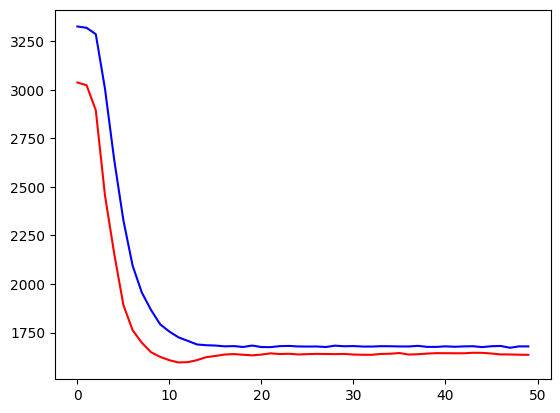

In [ ]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')

In [ ]:
y_test[0:1]

array([[18., 21., 13., 15., 19.,  3., 25., 22.,  2., 26., 17., 10., 12.,
        20., 16., 11., 23.,  0., 24.,  4.,  7.,  5.,  9.,  6.,  1.,  8.,
        14.]], dtype=float32)

In [ ]:
puntajes = model_listas.predict(X_test[0:1])
# Ordena los elementos según sus puntajes
indices_ordenados = np.argsort(-puntajes)

1/1 [==============================] - 0s 465ms/step


In [ ]:
puntajes[0]

array([14.265223 , 11.560456 , 10.597901 , 14.790096 , 10.9917345,
        7.580017 , 15.118959 , 12.170841 , 15.244124 , 14.351833 ,
       14.613194 , 12.288717 , 12.8536825, 17.372469 , 13.132872 ,
       12.573184 , 12.944057 , 11.144542 , 11.996893 , 10.2542305,
       12.392731 , 14.21827  , 15.212286 , 11.377636 , 13.028699 ,
       14.960397 , 20.355288 ], dtype=float32)

In [ ]:
indices_ordenados

array([[26, 13,  8, 22,  6, 25,  3, 10,  9,  0, 21, 14, 24, 16, 12, 15,
        20, 11,  7, 18,  1, 23, 17,  4,  2, 19,  5]])

In [ ]:
perdida_listas(y_test[0:1], indices_ordenados)

<tf.Tensor: shape=(), dtype=float64, numpy=262.0>

In [ ]:
loss = model_listas.evaluate(X_test, y_test, verbose=1)
print("Loss promedio del modelo en los datos de prueba:", loss/X_test.shape[0])

1/1 [==============================] - 0s 37ms/step - loss: 4892.3472
Loss promedio del modelo en los datos de prueba: 188.16719876802884


# MARKO

In [ ]:
X_test.shape, dias_dato, dias_para_calcular_y  

((26, 30, 27), 30, 30)

In [ ]:
26*30

780

In [ ]:
historico_para_marko = cleaned_close_prices_df[-780:]
historico_para_marko.shape

(780, 27)

In [ ]:
def pesos_marko(datos_top, num_portfolios = 1000):
  
  returns = datos_top.pct_change().dropna()
  cov_matrix = returns.cov()
  tickers = datos_top.columns
  # Número de simulaciones de cartera

  # Inicializar arrays para almacenar los resultados de las simulaciones
  portfolio_returns = np.zeros(num_portfolios)
  portfolio_volatilities = np.zeros(num_portfolios)
  portfolio_weights = np.zeros((num_portfolios, len(tickers)))

  # Realizar las simulaciones de cartera
  for i in range(num_portfolios):
      # Generar ponderaciones aleatorias y normalizarlas para que sumen 1
      weights = np.random.random(len(tickers))
      weights /= np.sum(weights)

      # Calcular el rendimiento y la volatilidad de la cartera
      portfolio_return = np.dot(weights, returns.mean()) * 252
      portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

      # Almacenar los resultados
      portfolio_returns[i] = portfolio_return
      portfolio_volatilities[i] = portfolio_volatility
      portfolio_weights[i, :] = weights

  # Supongamos una tasa libre de riesgo del ...
  risk_free_rate = 0.01

  # Calcular el índice de Sharpe para cada cartera simulada
  sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_volatilities

  carteras_ordenadas = np.argsort(-sharpe_ratios) 

  return portfolio_weights[carteras_ordenadas[0]]

In [ ]:
inicio = 0
paso = 30
final = historico_para_marko.shape[0] - paso - paso

top_marko = 5
num_carteras_marko = 1000

historico_balance = []
dias_balance = []

for i in range(inicio, final, paso):
    dato = historico_para_marko[i:i+paso]
    #print(dato.shape)

    log_ret = np.log(dato / dato.shift(1)).dropna()
    #print(log_ret.shape)

    log_ret = np.array(log_ret).reshape(1, log_ret.shape[0], log_ret.shape[1])

    # //\\ AQUI USAMOS NUESTRO MODELO //\\

    puntajes = model_listas.predict(log_ret)
    #print(puntajes.shape)
    #print(puntajes)
    indices_ordenados = np.argsort(-puntajes)
    #print(indices_ordenados)
    top = indices_ordenados[0][0:top_marko]
    #print(top)
    datos_top = dato.iloc[:,top]
    #print(datos_top.head())

    pesos = pesos_marko(datos_top, num_carteras_marko)
    #print(pesos.shape)

    datos_futuro = historico_para_marko.iloc[:,top][i+paso:i+paso+paso]
    #rendimiento_futuro = np.log(datos_futuro/datos_futuro.shift(1)).dropna().sum()
    rendimiento_futuro = datos_futuro.pct_change().dropna().sum()
    #print(rendimiento_futuro.shape)
    #print(datos_futuro.columns)
    #print(rendimiento_futuro)

    balance = (pesos * rendimiento_futuro).sum()
    #print(balance)

    historico_balance.append(balance)

    dias_balance.append(dato.index[-1])
    

1/1 [==============================] - 0s 38ms/step


In [ ]:
historico_para_marko.index[0], historico_para_marko.index[-1]

(Timestamp('2020-04-06 00:00:00'), Timestamp('2023-04-20 00:00:00'))

In [ ]:
# retorno cutre anualizado
( (pd.Series(historico_balance).cumsum() + 1)[-1:] -1 ) / 3

23    0.102571
dtype: float64

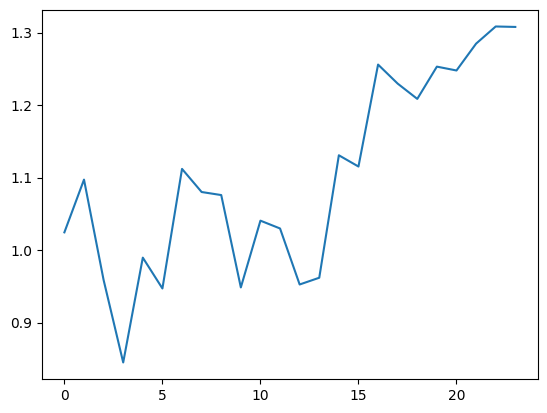

In [ ]:
plt.plot(pd.Series(historico_balance).cumsum() + 1)

# COMPARAR CON BENCHMARk

In [ ]:
retornos_modelo = pd.DataFrame(historico_balance, index = dias_balance)
retornos_modelo.head()

,0
2020-05-20,0.024506
2020-07-01,0.072704
2020-08-12,-0.138341
2020-09-23,-0.113760
2020-11-04,0.144537


In [ ]:
ticker = '^IBEX'

ibex = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
retornos_bench = ibex['Close'].pct_change().dropna().cumsum().loc[retornos_modelo.index]

In [ ]:
retornos_modelo = retornos_modelo.iloc[:,0].cumsum()

In [ ]:
retornos_modelo.shape, retornos_bench.shape

((24,), (24,))

In [ ]:
type(retornos_modelo), type(retornos_bench)

(pandas.core.series.Series, pandas.core.series.Series)

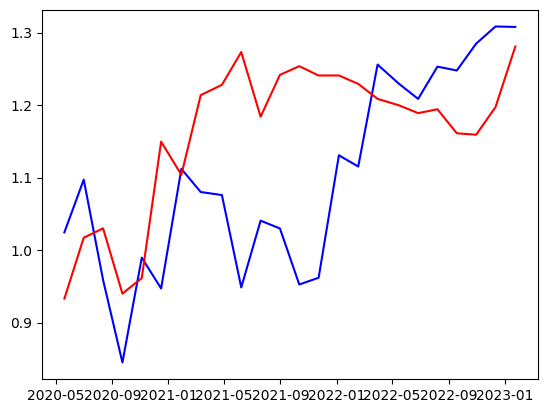

In [ ]:
plt.plot(retornos_modelo+1, 'b')
plt.plot(retornos_bench+1, 'r')